<a href="https://colab.research.google.com/github/Instyrah/CNN/blob/main/object_detection_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pillow

In [ ]:
# Import library yang diperlukan
import tensorflow as tf                      # Untuk model dan prediksi
import numpy as np                           # Untuk operasi numerik
from PIL import Image, ImageOps              # Untuk memproses gambar
import matplotlib.pyplot as plt              # Untuk menampilkan gambar
from google.colab import files               # Untuk mengunggah file di Google Colab

In [ ]:
# Fungsi untuk memuat model MobileNetV2 dengan bobot pre-trained dari ImageNet
def load_model():
    model = tf.keras.applications.MobileNetV2(weights='imagenet')
    return model

In [ ]:
# Fungsi untuk melakukan preprocessing gambar
def preprocess_image(image):
    # Ubah ukuran gambar menjadi 224x224 piksel sesuai dengan input model MobileNetV2
    image = image.resize((224, 224))
    # Ubah gambar menjadi array numpy
    image_array = np.array(image)
    # Pastikan gambar memiliki 3 channel (RGB); jika ada channel alpha (RGBA), buang channel tersebut
    if image_array.shape[-1] == 4:
        image_array = image_array[..., :3]
    # Lakukan preprocessing sesuai dengan MobileNetV2
    processed_image = tf.keras.applications.mobilenet_v2.preprocess_input(image_array)
    # Tambahkan dimensi batch: dari (224,224,3) menjadi (1,224,224,3)
    processed_image = np.expand_dims(processed_image, axis=0)
    return processed_image

In [ ]:
# Memuat model
model = load_model()
print("Model MobileNetV2 berhasil dimuat.")

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Model MobileNetV2 berhasil dimuat.


Silakan unggah gambar (format: jpg, jpeg, atau png):


Saving images (2).jpeg to images (2).jpeg


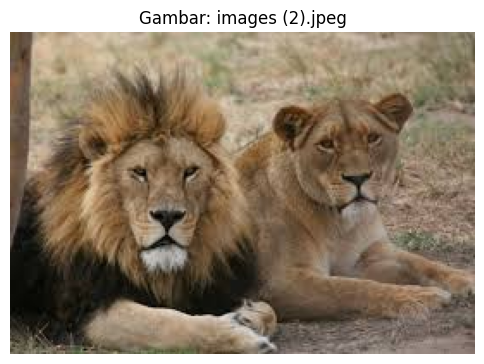

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
### Hasil Prediksi untuk images (2).jpeg ###
1. lion: 96.34%
2. cheetah: 0.16%
3. leopard: 0.07%


In [ ]:
# Mengunggah gambar menggunakan widget Google Colab
print("Silakan unggah gambar (format: jpg, jpeg, atau png):")
uploaded = files.upload()

# Proses setiap file yang diunggah
for filename in uploaded.keys():
    # Membaca gambar dengan PIL
    image = Image.open(filename)

    # Menampilkan gambar yang diunggah
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f"Gambar: {filename}")
    plt.axis('off')
    plt.show()

    # Melakukan preprocessing gambar
    processed_image = preprocess_image(image)

    # Melakukan prediksi menggunakan model
    predictions = model.predict(processed_image)

    # Mendecode prediksi untuk mendapatkan label dan probabilitas (top 3)
    decoded_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(predictions, top=3)[0]

    # Menampilkan hasil prediksi
    print(f"### Hasil Prediksi untuk {filename} ###")
    for i, (imagenetID, label, prob) in enumerate(decoded_predictions):
        print(f"{i+1}. {label}: {prob*100:.2f}%")
